In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [2]:
# Load the forest fire dataset
forest_data = pd.read_csv('/content/forestfires.csv')

In [3]:
# Preview the dataset
print(forest_data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [4]:
# Get the number of rows and columns in the dataset
print("\nDataset shape:", forest_data.shape)


Dataset shape: (517, 13)


In [5]:
# Display statistical measures of the data
print("Statistical measures of the data:")
print(forest_data.describe())

Statistical measures of the data:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469

In [6]:
# Create a new column 'status': Fire occurred or No Fire
forest_data['status'] = forest_data['area'].apply(lambda x: 'Fire' if x > 0 else 'No Fire')

# Display the count of outcomes
print("Status counts:")
print(forest_data['status'].value_counts())


Status counts:
status
Fire       270
No Fire    247
Name: count, dtype: int64


In [7]:
# Correct separation of features and target
X = forest_data.drop(columns=['area','status'])  # only numeric input features
y = forest_data['status']                        # target labels

In [8]:
# Encode month/day as numeric codes
forest_data['month'] = forest_data['month'].astype('category').cat.codes
forest_data['day'] = forest_data['day'].astype('category').cat.codes

In [9]:
# Features (X) → only numeric columns
X = forest_data.drop(columns=['area','status'])  # remove target and text columns

# Target (y)
y = (forest_data['area'] > 0).astype(int)  # 1 = Fire, 0 = No Fire

In [10]:
# Display features and labels
print("\nInput features (first 5 rows):")
print(X.head())

print("\nLabels (first 5 rows):")
print(y.head())


Input features (first 5 rows):
   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain
0  7  5      7    0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1  7  4     10    5  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2  7  4     10    2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3  8  6      7    0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
4  8  6      7    3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0

Labels (first 5 rows):
0    0
1    0
2    0
3    0
4    0
Name: area, dtype: int64


In [11]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# 6️⃣ Scale Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Train Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Evaluate the model

# Training accuracy
y_train_pred = model.predict(X_train_scaled)
print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))

# Testing accuracy
y_test_pred = model.predict(X_test_scaled)
print("\nTesting Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.9927360774818402

Testing Accuracy: 0.5288461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.45      0.48        51
           1       0.53      0.60      0.57        53

    accuracy                           0.53       104
   macro avg       0.53      0.53      0.53       104
weighted avg       0.53      0.53      0.53       104



In [15]:
# Save the model and scaler
with open('forest_fire_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("\nModel and scaler saved successfully!")



Model and scaler saved successfully!


In [22]:
loaded_scaler.feature_names_in_


array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'], dtype=object)

In [23]:
# Load model
with open('forest_fire_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load scaler
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Use the exact order as shown by loaded_scaler.feature_names_in_
columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Create sample input DataFrame in the same order
sample_input = pd.DataFrame([[7, 5, 7, 5, 85.0, 30.0, 400.0, 5.0, 30.0, 40.0, 10.0, 0.0]], columns=columns)

# Scale input
sample_input_scaled = loaded_scaler.transform(sample_input)

# Predict fire risk
prediction = loaded_model.predict(sample_input_scaled)
print("\nPredicted Fire Risk:", prediction[0])




Predicted Fire Risk: 1


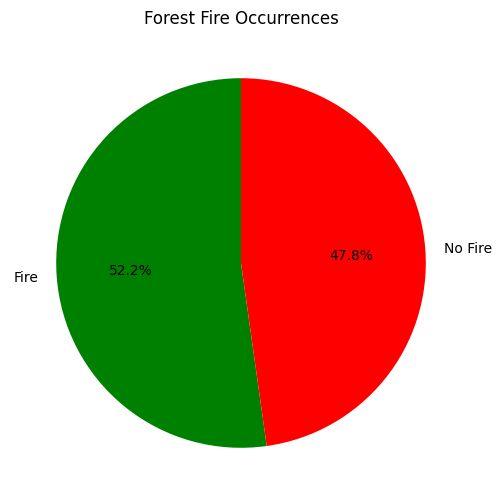

In [17]:
# Pie chart for Fire vs No Fire
fire_counts = forest_data['status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(fire_counts, labels=fire_counts.index, autopct='%1.1f%%', colors=['green','red'], startangle=90)
plt.title('Forest Fire Occurrences')
plt.show()


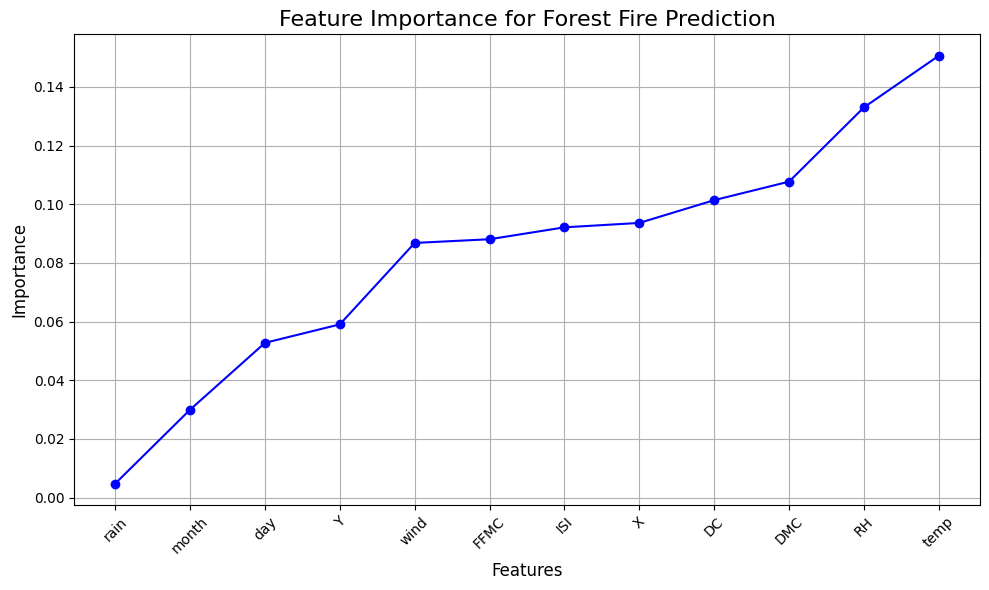

In [18]:

# Feature names and importance values
features = X.columns
importances = model.feature_importances_


sorted_idx = np.argsort(importances)
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# Line plot
plt.figure(figsize=(10,6))
plt.plot(sorted_features, sorted_importances, marker='o', linestyle='-', color='blue')
plt.title('Feature Importance for Forest Fire Prediction', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


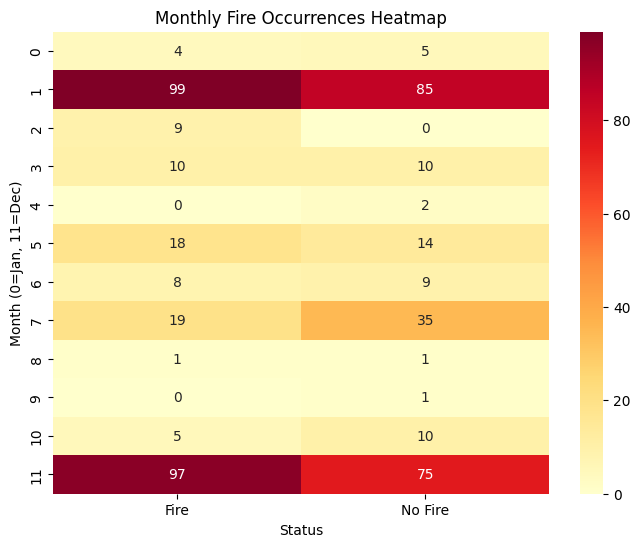

In [19]:
# Prepare data
monthly_counts = forest_data.groupby(['month','status']).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(monthly_counts, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Monthly Fire Occurrences Heatmap')
plt.xlabel('Status')
plt.ylabel('Month (0=Jan, 11=Dec)')
plt.show()